<span style="background-color: cyan; font-size: 24px;">
<b> NAME : </b> Anmol Sinha <br/>
<b> SECTION : </b> 1 <br/>
<b> BITS-ID : </b> 2025AE05129 <br/>
<b> Assignment : </b> 2 <br/>
<b> Subject : </b> MFML
</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
import sklearn.decomposition as sklearn_decomp

<hr/>
<hr/>

# <u><b> Q1. PCA for Breast Cancer Diagnosis (Real Data) </b></u>

<hr/>

## (1) - Ans.(a)

In [2]:
np.set_printoptions(precision=4, suppress=True)
# Load the dataset
cancer_data = load_breast_cancer()

# Access the features (X) and target (y) as NumPy arrays
X = cancer_data.data
y = cancer_data.target

brCncrDF = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

# Optional: print the shapes to confirm they are NumPy arrays
print(f"Shape of X (n x d): {X.shape}")
print(f"Type of X: {type(X)}")
print(f"Shape of y: {y.shape}")
print(f"Type of y: {type(y)}")
print("Target output classifications :",list(cancer_data.target_names))
print(" Input Columns :",cancer_data.feature_names)

# Just to view the data and its features/components/elements
brCncrDF

Shape of X (n x d): (569, 30)
Type of X: <class 'numpy.ndarray'>
Shape of y: (569,)
Type of y: <class 'numpy.ndarray'>
Target output classifications : [np.str_('malignant'), np.str_('benign')]
 Input Columns : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


DDOF - Delta Degrees of Freedom, i.e difference of total dataset size from "Degrees of Freedom" (DOF) represents the subtraction, where "Degrees of Freedom" used for Variance and Standard Deviations, which represents the number of independent values in a dataset that are free to vary.

In [3]:

def standardized_scaler(X, dof_sub=1):
    # Step-2
    µ = X.mean(axis=0, keepdims=True)  # X.sum(axis=0, keepdims=True) / (X.shape[0])
    # X = X-µ
    var = X.var(axis=0, keepdims=True, ddof=dof_sub)  # ((X - µ) ** 2).sum(axis=0, keepdims=True) / (X.shape[0] - dof_sub)
    σ = var**0.5
    σ[σ == 0] = 1.0
    # variance has no effect on mean shifting, mean centring done below
    Z = (X - µ) / σ
    return Z, µ, σ

def covariance_matrix(Xc, dof_sub=1):
    # Step-3.1
    n = Xc.shape[0]
    return (Xc.T @ Xc) / (n - dof_sub)

In [4]:
# Have assumed, default Degrees of Freedom = 'N-1', and not 'N' as is used by sci-kit_learn package as well
Z, µ, σ = standardized_scaler(X)  # standardized_scaler the data, with zero mean, unit variance (sample std)
# After standardization, Z is already centered (up to tiny numeric noise)
S = covariance_matrix(Z)     # 30x30 sample covariance of standardized data

print("Low-dimension compressed code :",Z)
print("Mean values array:", µ)
print("Standard Deviation array:", σ)
print("Co-variance matrix", S)
Z.shape

Low-dimension compressed code : [[ 1.0961 -2.0715  1.2688 ...  2.2941  2.7482  1.9353]
 [ 1.8282 -0.3533  1.6845 ...  1.0861 -0.2437  0.2809]
 [ 1.5785  0.4558  1.5651 ...  1.9533  1.1512  0.2012]
 ...
 [ 0.7017  2.0438  0.6721 ...  0.4137 -1.1036 -0.3181]
 [ 1.8367  2.3344  1.9808 ...  2.288   1.9174  2.2177]
 [-1.8068  1.2207 -1.8128 ... -1.7435 -0.0481 -0.7505]]
Mean values array: [[ 14.1273  19.2896  91.969  654.8891   0.0964   0.1043   0.0888   0.0489
    0.1812   0.0628   0.4052   1.2169   2.8661  40.3371   0.007    0.0255
    0.0319   0.0118   0.0205   0.0038  16.2692  25.6772 107.2612 880.5831
    0.1324   0.2543   0.2722   0.1146   0.2901   0.0839]]
Standard Deviation array: [[  3.524    4.301   24.299  351.9141   0.0141   0.0528   0.0797   0.0388
    0.0274   0.0071   0.2773   0.5516   2.0219  45.491    0.003    0.0179
    0.0302   0.0062   0.0083   0.0026   4.8332   6.1463  33.6025 569.357
    0.0228   0.1573   0.2086   0.0657   0.0619   0.0181]]
Co-variance matrix [[ 1.    

(569, 30)

In [5]:
# Have assumed, default Degrees of Freedom = 'N-1', and not 'N' as is used by sci-kit_learn package as well
norm_S_frob = (S**2).sum()**0.5 # Frobenius Norm

print("Shape of S:", S.shape)
print("Frobenius Norm (||S||_F):", norm_S_frob, ", and confirmation with in-built function if it matches :",abs(norm_S_frob-np.linalg.norm(S))<1e-8)
print("Displaying Spectral Norm (||S||_2), for comparison:", np.linalg.norm(S,2))

Shape of S: (30, 30)
Frobenius Norm (||S||_F): 15.035879368103988 , and confirmation with in-built function if it matches : True
Displaying Spectral Norm (||S||_2), for comparison: 13.281607682257913


<hr/>

## (1) - Ans. (b)

In [6]:
# No. of orthonormal components, in projection matrix-B, formed of eigenvectors of co-variance matrix-S.
ortho_k = 2 # total 30
skpca = sklearn_decomp.PCA(n_components=ortho_k, svd_solver="full")
scores_2d = skpca.fit_transform(Z)   # fit on standardized (centered) dataset of lower dimension compression

eigvals = skpca.explained_variance_
evr = skpca.explained_variance_ratio_
cums = np.cumsum(evr)

print("\n *> Top-2 Eigenpairs (sklearn PCA) :-")
print("λ1, λ2:", eigvals)
print("Explained variance ratio (%):", evr * 100.0)
print("Cumulative (%):", cums * 100.0)

# ALTER method (manual calculation)
eigvals_, eigvectors_  = np.linalg.eig(S) # descending order of eigens
evr_ = eigvals_ / eigvals_.sum()
curr = 0
cum2 = np.array([curr := curr + val for val in evr_])

print(" \n*> Confirmation & Validation : Comparison with above, displaying all (without sklearn PCA - manually calulated) :-")
print("\nAll Eigenvalues:", eigvals_, ". Is matching with SKLearn :",np.allclose(eigvals, eigvals_[:2], atol=1e-8))
print("\nAll Explained variance ratio (%):", evr_ * 100.0, ". Is matching with SKLearn :",np.allclose(evr, evr[:2], atol=1e-8))
print("\nAll Cumulative (%):", cum2 * 100.0, ". Is matching with SKLearn :",np.allclose(cums, cum2[:2], atol=1e-8))


 *> Top-2 Eigenpairs (sklearn PCA) :-
λ1, λ2: [13.2816  5.6914]
Explained variance ratio (%): [44.272  18.9712]
Cumulative (%): [44.272  63.2432]
 
*> Confirmation & Validation : Comparison with above, displaying all (without sklearn PCA - manually calulated) :-

All Eigenvalues: [13.2816  5.6914  2.8179  1.9806  1.6487  1.2074  0.6752  0.4766  0.4169
  0.3507  0.2939  0.2612  0.2414  0.157   0.0941  0.0799  0.0594  0.0526
  0.0495  0.0001  0.0007  0.0016  0.0069  0.0082  0.0155  0.0181  0.0243
  0.0274  0.0312  0.03  ] . Is matching with SKLearn : True

All Explained variance ratio (%): [44.272  18.9712  9.3932  6.6021  5.4958  4.0245  2.2507  1.5887  1.3896
  1.169   0.9797  0.8705  0.8045  0.5234  0.3138  0.2662  0.198   0.1754
  0.1649  0.0004  0.0025  0.0053  0.023   0.0273  0.0516  0.0602  0.0811
  0.0915  0.1039  0.0999] . Is matching with SKLearn : True

All Cumulative (%): [ 44.272   63.2432  72.6364  79.2385  84.7343  88.7588  91.0095  92.5983
  93.9879  95.1569  96.1366  97

<hr/>

## (1) - Ans. (c)

Class 'malignant' mean in 2D: [ 3.7115 -0.5826]
Class 'benign'    mean in 2D: [-2.204  0.346]


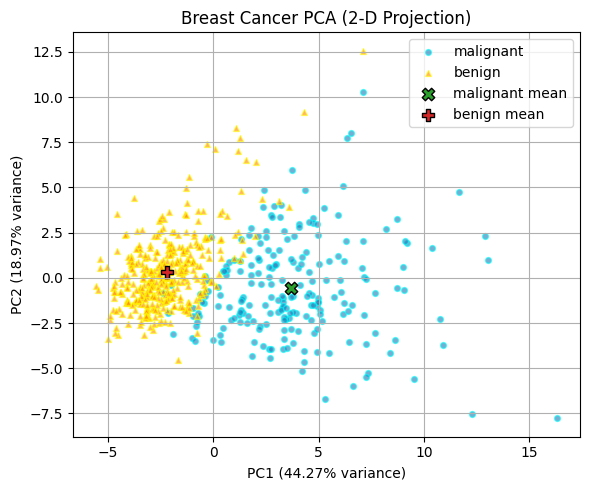

In [7]:
class Plotting_Metadata:
    def __init__(self,scores,means,var_ratio):
        self.scores = scores
        self.means = means
        self.var_ratio = var_ratio

classifier_map_dict = {}
for idx,class_i in enumerate(cancer_data.target_names):
    classifier_map_dict[str(class_i)]=Plotting_Metadata(scores_2d[y==idx], scores_2d[y==idx].mean(axis=0), evr[idx])

print("Class 'malignant' mean in 2D:", classifier_map_dict['malignant'].means)
print("Class 'benign'    mean in 2D:", classifier_map_dict['benign'].means)

# Plot (single figure, default colors, distinct markers)
plt.figure(figsize=(6, 5))
plt.scatter(classifier_map_dict['malignant'].scores[:, 0], classifier_map_dict['malignant'].scores[:, 1], label="malignant", alpha=0.6, s=18, marker='o',edgecolors='cyan')
plt.scatter(classifier_map_dict['benign'].scores[:, 0], classifier_map_dict['benign'].scores[:, 1], label="benign", alpha=0.6, s=18, marker='^',edgecolors='yellow')
plt.scatter([classifier_map_dict['malignant'].means[0]], [classifier_map_dict['malignant'].means[1]], label="malignant mean", marker='X', s=80, edgecolors='black')
plt.scatter([classifier_map_dict['benign'].means[0]], [classifier_map_dict['benign'].means[1]], label="benign mean", marker='P', s=80,edgecolors='black')
plt.xlabel(f"PC1 ({round(classifier_map_dict['malignant'].var_ratio*100,2)}% variance)")
plt.ylabel(f"PC2 ({round(classifier_map_dict['benign'].var_ratio*100,2)}% variance)")
plt.grid(True)
plt.title("Breast Cancer PCA (2-D Projection)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

<hr/>

## (1) - Ans. (d)

In [8]:
Z_recon_2d = skpca.inverse_transform(scores_2d)  # back to standardized space
avg_mse_z = ((Z-Z_recon_2d)**2).mean()           # average per-sample MSE (feature space)
Z_recon_2d_manual = scores_2d @ eigvectors_[:, :2].T
X_recon_2d = Z_recon_2d * σ + μ
avg_mse_x = ((X_recon_2d-X)**2).mean()  

print("\n Reconstruction Error :-\n")
print("\nOriginal  :",Z)
print("\nReconstructed Shape (X~):",Z_recon_2d,"\nIs the SK-Learn in-built function output matching with mathematically/manually computed reconstruction:",np.allclose(Z_recon_2d_manual,Z_recon_2d,1e-8))
print("\nAverage per-sample reconstruction MSE as per scaled normalized values (from 2D - PCA):", avg_mse_z)
print("\nOveral actual MSE as per actual values of dataset (from 2D - PCA):", avg_mse_x)


 Reconstruction Error :-


Original  : [[ 1.0961 -2.0715  1.2688 ...  2.2941  2.7482  1.9353]
 [ 1.8282 -0.3533  1.6845 ...  1.0861 -0.2437  0.2809]
 [ 1.5785  0.4558  1.5651 ...  1.9533  1.1512  0.2012]
 ...
 [ 0.7017  2.0438  0.6721 ...  0.4137 -1.1036 -0.3181]
 [ 1.8367  2.3344  1.9808 ...  2.288   1.9174  2.2177]
 [-1.8068  1.2207 -1.8128 ... -1.7435 -0.0481 -0.7505]]

Reconstructed Shape (X~): [[ 1.5553  0.8364  1.6709 ...  2.2883  1.4051  1.7465]
 [ 1.4027  0.4722  1.353  ...  0.6296 -0.241  -0.7222]
 [ 1.5053  0.6584  1.5347 ...  1.4462  0.5517  0.4592]
 ...
 [ 0.7192  0.2437  0.6946 ...  0.3306 -0.1154 -0.3579]
 [ 1.8784  0.9754  1.9991 ...  2.5868  1.511   1.826 ]
 [-1.0408 -0.5274 -1.1005 ... -1.3669 -0.7674 -0.9054]] 
Is the SK-Learn in-built function output matching with mathematically/manually computed reconstruction: True

Average per-sample reconstruction MSE as per scaled normalized values (from 2D - PCA): 0.3669219341636949

Overal actual MSE as per actual values of d

<hr/>
<hr/>

# <u><b> Q2. PCA with Missing Values (Synthetic Spectroscopy) <b/></u>

<hr/>

## (2) - Ans.(a)

In [9]:
# Load the data
X_Spectr = np.genfromtxt('synthetic_pca_dataset.csv', delimiter=',', skip_header=1)

print("Dataset shape:", X_Spectr.shape)
print("Number of missing values in each column (X1-X5):")
print(np.sum(np.isnan(X_Spectr), axis=0))

# Just to view the data
spctrDF = pd.read_csv('synthetic_pca_dataset.csv')
spctrDF

Dataset shape: (400, 5)
Number of missing values in each column (X1-X5):
[ 0  0  0  0 34]


,X1,X2,X3,X4,X5
0,13.636652,12.278138,-57.711538,17.678951,0.152177
1,2.836132,1.513431,-112.339157,-9.065892,-0.374126
2,7.695132,8.292800,71.636134,-0.127567,-0.013451
3,16.789237,16.937066,31.521533,35.440993,0.815472
4,13.592875,12.449632,-184.595117,22.514090,0.410602
...,...,...,...,...,...
395,-5.641870,-5.440050,-89.405462,-3.001612,NaN
396,6.481119,5.873619,14.466258,-2.660581,-0.902072
397,7.722826,8.662335,-106.917738,3.582769,0.320999
398,9.781069,9.919273,-48.175837,9.965707,-1.392016


In [10]:
# Imputation - Fill missing values in X5 using mean imputation format
X5_with_nan = X_Spectr[:, -1].copy()
X5_mean = np.nanmean(X_Spectr[:, -1]) # X5_with_nan(~np.isnan(X_Spectr[:, -1]))
X_imputed = X_Spectr.copy()
X_imputed[np.isnan(X_imputed[:, -1]), -1] = X5_mean

print(f"\n(a) Mean imputation for X5: {X5_mean:.6f}")
print(f"Missing values after imputation: {np.sum(np.isnan(X_imputed))}")



(a) Mean imputation for X5: -0.059253
Missing values after imputation: 0


<hr/>

## (2) - Ans.(b)

In [11]:

# b) Two PCAs
# (i) Covariance PCA on raw (unstandardized) data
pca_cov = sklearn_decomp.PCA( svd_solver="full")
X_pca_cov = pca_cov.fit_transform(X_imputed)

# (ii) Correlation PCA on standardized data
X_standardized, µ_spectr, σ_spectr = standardized_scaler(X_imputed)
pca_corr = sklearn_decomp.PCA( svd_solver="full")
X_pca_corr = pca_corr.fit_transform(X_standardized)

print("Principal Components dimensions , for Covariance :",X_pca_cov.shape, ", is it same as original and standardized datasets :",X_pca_cov.shape == X_standardized.shape == X_imputed.shape,". Loading components shape in PCA Cov :",pca_cov.components_.shape)
print("Principal Components dimensions , for Correlation :",X_pca_corr.shape, ", is it same as original and standardized datasets :",X_pca_cov.shape == X_standardized.shape == X_imputed.shape,". Loading components shape in PCA Corr :",pca_corr.components_.shape)

Principal Components dimensions , for Covariance : (400, 5) , is it same as original and standardized datasets : True . Loading components shape in PCA Cov : (5, 5)
Principal Components dimensions , for Correlation : (400, 5) , is it same as original and standardized datasets : True . Loading components shape in PCA Corr : (5, 5)


<hr/>

## (2) - Ans.(c)

In [12]:

# c) Spectrum - Report eigenvalues and explained variance ratios
print("\nSpectrum Analysis:")
print("\n(i) Covariance PCA:")
print("Eigenvalues:", pca_cov.explained_variance_)
print("Explained variance ratio:", pca_cov.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca_cov.explained_variance_ratio_))

print("\n(ii) Correlation PCA:")
print("Eigenvalues:", pca_corr.explained_variance_)
print("Explained variance ratio:", pca_corr.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca_corr.explained_variance_ratio_))



Spectrum Analysis:

(i) Covariance PCA:
Eigenvalues: [10222.0768   130.4011   106.9311     0.8329     0.216 ]
Explained variance ratio: [0.9772 0.0125 0.0102 0.0001 0.    ]
Cumulative explained variance: [0.9772 0.9897 0.9999 1.     1.    ]

(ii) Correlation PCA:
Eigenvalues: [2.0021 1.0728 0.9858 0.9353 0.004 ]
Explained variance ratio: [0.4004 0.2146 0.1972 0.1871 0.0008]
Cumulative explained variance: [0.4004 0.615  0.8121 0.9992 1.    ]


<hr/>

## (2) - Ans.(d)

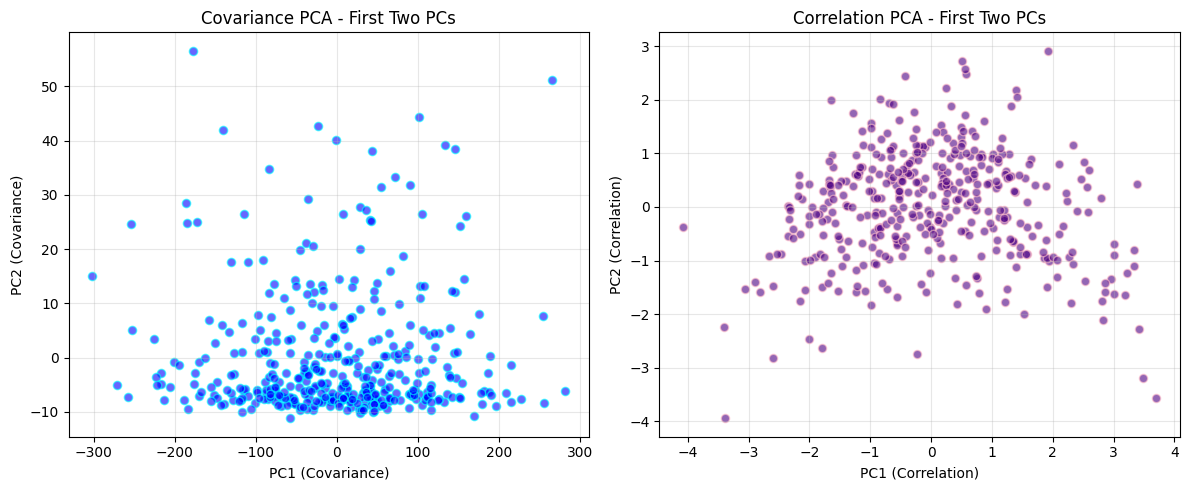


Observations upon the Structure/Cluster Patterns for Covariance and Correlation graphs for 2-D projections (PC1 vs. PC2) :-
Both PCA methods show data spread along the first two principal components.
Covariance PCA: The scale is dominated by variables with larger variance.
Correlation PCA: All variables contribute equally due to standardization.
No clear clusters visible, suggesting continuous variation in the latent factors.


(400, 5)

In [13]:

# d) PC Scatter - Transform data to first two PCs and plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca_cov[:, 0], X_pca_cov[:, 1], alpha=0.6,edgecolor='cyan',color='blue')
plt.xlabel('PC1 (Covariance)')
plt.ylabel('PC2 (Covariance)')
plt.title('Covariance PCA - First Two PCs')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_pca_corr[:, 0], X_pca_corr[:, 1], alpha=0.6, edgecolor='pink',color='indigo')
plt.xlabel('PC1 (Correlation)')
plt.ylabel('PC2 (Correlation)')
plt.title('Correlation PCA - First Two PCs')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservations upon the Structure/Cluster Patterns for Covariance and Correlation graphs for 2-D projections (PC1 vs. PC2) :-")
print("Both PCA methods show data spread along the first two principal components.\nCovariance PCA: The scale is dominated by variables with larger variance.\nCorrelation PCA: All variables contribute equally due to standardization.\nNo clear clusters visible, suggesting continuous variation in the latent factors.")
X_pca_corr.shape

<hr/>

## (2) - Ans.(e)

In [14]:

# e) Reconstruction (2 PCs) - Report average reconstruction MSE
def reconstruct_with_n_components(pca_model, X_transformed, n_components, scaler_use=False):
    """Reconstruct data using first n components"""
    # Get the transformed data with only n components
    X_transformed_n = X_transformed[:, :n_components].copy()
    
    # Create a matrix with zeros for the remaining components
    X_reduced = np.zeros_like(X_transformed)
    X_reduced[:, :n_components] = X_transformed_n
    
    # Inverse transform
    if scaler_use:
        X_reconstructed_standard = pca_model.inverse_transform(X_reduced)
        X_reconstructed = X_reconstructed_standard* σ_spectr + µ_spectr
    else:
        X_reconstructed_standard = pca_model.inverse_transform(X_reduced)
        X_reconstructed = X_reconstructed_standard
    
    return X_reconstructed_standard, X_reconstructed

# Reconstruct using 2 PCs for both methods
X_recon_cov_std,X_recon_cov_orig = reconstruct_with_n_components(pca_cov, X_pca_cov, 2)
X_recon_corr_std,X_recon_corr_orig = reconstruct_with_n_components(pca_corr, X_pca_corr, 2, True)

# Calculate MSE
mse_cov = np.mean((X_imputed - X_recon_cov_std) ** 2)
mse_corr = np.mean((X_imputed - X_recon_corr_orig) ** 2)
mse_corr_scaled = np.mean((X_standardized - X_recon_corr_std) ** 2)

print(f"\n(e) Reconstruction MSE using 2 PCs :-")
print(f"Covariance PCA MSE: {mse_cov:.6f}")
print(f"\nCorrelation PCA MSE: {mse_corr:.6f}")
print(f"Correlation Scaled - PCA MSE: {mse_corr_scaled:.6f}")

print(f"\n\n  - Covariance PCA captures,{np.cumsum(pca_cov.explained_variance_ratio_)[1]*100:.2f}% of variance")
print(f"  - Correlation PCA captures,{np.cumsum(pca_corr.explained_variance_ratio_)[1]*100:.2f}% of variance")



(e) Reconstruction MSE using 2 PCs :-
Covariance PCA MSE: 21.542028

Correlation PCA MSE: 1227.964292
Correlation Scaled - PCA MSE: 0.384065


  - Covariance PCA captures,98.97% of variance
  - Correlation PCA captures,61.50% of variance


#### IMPORTANT NOTE : 
- As tested extensively, <b>sklearn.decomposition.PCA()</b> uses by default, Degrees of Freedom = N-1 (as 'Delta Degrees of Freedom=1' by default),
- While, <b>sklearn.preprocessing.StandardScaler()</b> uses by default, Degrees of Freedom = N (as 'Delta Degrees of Freedom=0' by default),
- Due to which there is small discrepancy in the "Correlation Scaled - PCA MSE:" which assumes value of '0.385028' wrongly !
- Hence, if sklearn.preprocessing.StandardScaler() is used with "Delta Degrees of Freedom" (DDOF=1) only then the correct value is obtained for 'Correlation Scaled - PCA MSE: 0.384065'

<hr/>

## (2) - Ans.(f)

In [38]:

# f) Project New Data - Show how to project a new sample
print("\nProjecting New Data:")

# Create a new sample (using mean of each column as example)
x_new = 5+X_Spectr.mean(axis=0, keepdims=True)  
x_new [:,-1] = X5_mean# Using imputed mean for X5
print(f"New sample: {x_new}")

# Project using Covariance PCA
x_new_pca_cov = pca_cov.transform(x_new.reshape(1, -1))
print(f"Covariance PCA coordinates (PC1, PC2): ({x_new_pca_cov[0, 0]:.4f}, {x_new_pca_cov[0, 1]:.4f})")

# Project using Correlation PCA
x_new_standardized = (x_new - µ_spectr)/ σ_spectr
x_new_pca_corr = pca_corr.transform(x_new_standardized)
print(f"Correlation PCA coordinates (PC1, PC2): ({x_new_pca_corr[0, 0]:.4f}, {x_new_pca_corr[0, 1]:.4f})")

# Additional analysis: Compare the two PCA approaches
print("\n" + "="*50)
print("COMPARISON: Covariance PCA vs Correlation PCA")
print("="*50)

print("\nKey Differences:")
print("1. Scaling: Covariance PCA uses raw data, Correlation PCA uses standardized data")
print("2. Eigenvalues: Covariance PCA eigenvalues reflect actual variance magnitude")
print("3. Interpretation: Correlation PCA gives equal weight to all variables")

print(f"\nVariance explained by first 2 PCs:")
print(f"Covariance PCA: {np.sum(pca_cov.explained_variance_ratio_[:2])*100:.2f}%")
print(f"Correlation PCA: {np.sum(pca_corr.explained_variance_ratio_[:2])*100:.2f}%")

print(f"\nReconstruction quality:")
print(f"Covariance PCA captures more variance but may be dominated by high-variance features")
print(f"Correlation PCA provides more balanced representation across all features")


Projecting New Data:
New sample: [[ 4.7676  4.7442 -6.9359  4.9524 -0.0593]]
Covariance PCA coordinates (PC1, PC2): (5.0037, 5.7983)
Correlation PCA coordinates (PC1, PC2): (0.9769, -0.1641)

COMPARISON: Covariance PCA vs Correlation PCA

Key Differences:
1. Scaling: Covariance PCA uses raw data, Correlation PCA uses standardized data
2. Eigenvalues: Covariance PCA eigenvalues reflect actual variance magnitude
3. Interpretation: Correlation PCA gives equal weight to all variables

Variance explained by first 2 PCs:
Covariance PCA: 98.97%
Correlation PCA: 61.50%

Reconstruction quality:
Covariance PCA captures more variance but may be dominated by high-variance features
Correlation PCA provides more balanced representation across all features


In [39]:

# Manual verification of correlation PCA
print(f"\nManual verification of Correlation PCA:")
manual_corr_matrix = np.corrcoef(X_imputed.T)
manual_eigenvals, manual_eigenvecs = np.linalg.eigh(manual_corr_matrix)
print(f"Manual correlation matrix eigenvalues: {np.sort(manual_eigenvals)}")
print(f"SKLearn correlation PCA eigenvalues: {pca_corr.explained_variance_}")

# Check that correlation matrix eigenvalues sum to 5 (number of variables)
print(f"Sum of correlation matrix eigenvalues: {np.sum(manual_eigenvals):.6f}")


Manual verification of Correlation PCA:
Manual correlation matrix eigenvalues: [0.004  0.9353 0.9858 1.0728 2.0021]
SKLearn correlation PCA eigenvalues: [2.0021 1.0728 0.9858 0.9353 0.004 ]
Sum of correlation matrix eigenvalues: 5.000000



Observations upon the Structure/Cluster Patterns for Covariance and Correlation graphs for 2-D projections (PC1 vs. PC2) :-
Both PCA methods show data spread along the first two principal components.
Covariance PCA: The scale is dominated by variables with larger variance.
Correlation PCA: All variables contribute equally due to standardization.
No clear clusters visible, suggesting continuous variation in the latent factors.


(400, 5)

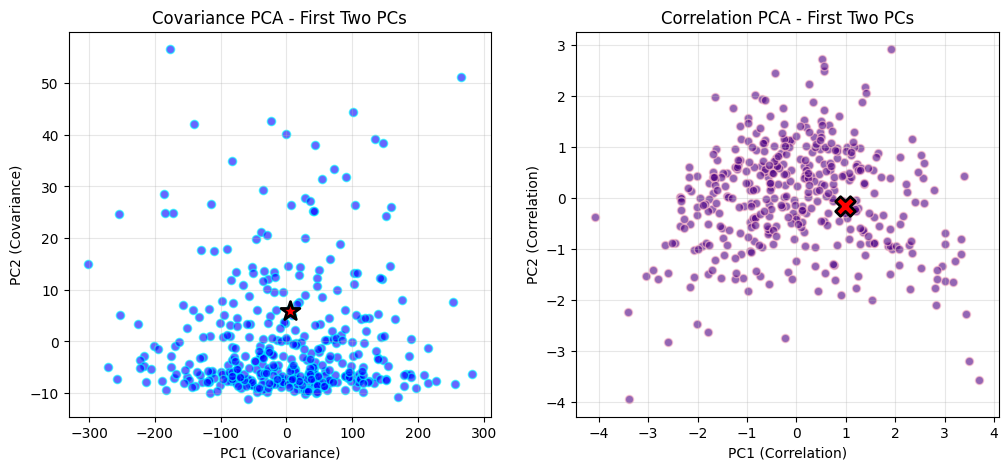

In [40]:

# d) PC Scatter - Transform data to first two PCs and plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca_cov[:, 0], X_pca_cov[:, 1], alpha=0.6,edgecolor='cyan',color='blue')
plt.scatter(x_new_pca_cov[0, 0], x_new_pca_cov[0, 1], color='red', s=200, marker='*', edgecolors='black', linewidths=2, label='New sample', zorder=5)
plt.xlabel('PC1 (Covariance)')
plt.ylabel('PC2 (Covariance)')
plt.title('Covariance PCA - First Two PCs')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_pca_corr[:, 0], X_pca_corr[:, 1], alpha=0.6, edgecolor='pink',color='indigo')
plt.scatter(x_new_pca_corr[0, 0], x_new_pca_corr[0, 1], color='red', s=200, marker='X', edgecolors='black', linewidths=2, label='New sample', zorder=5)
plt.xlabel('PC1 (Correlation)')
plt.ylabel('PC2 (Correlation)')
plt.title('Correlation PCA - First Two PCs')
plt.grid(True, alpha=0.3)


print("\nObservations upon the Structure/Cluster Patterns for Covariance and Correlation graphs for 2-D projections (PC1 vs. PC2) :-")
print("Both PCA methods show data spread along the first two principal components.\nCovariance PCA: The scale is dominated by variables with larger variance.\nCorrelation PCA: All variables contribute equally due to standardization.\nNo clear clusters visible, suggesting continuous variation in the latent factors.")
X_pca_corr.shape

<hr/>
<hr/>

# <u><b> Q3. Quadratic Programming (QP) <b/></u>

<hr/>

## (3) - Ans. (a)

In [18]:
M = np.array([[2, 1], [1, 4]])  # as provided in the question
c = np.array([5, 3])
A = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])
b = np.array([1, 1, 1, 1])

# For the dual problem, we need Q = 2H (since primal is xᵀHx, not 0.5xᵀHx)
Q = 2 * M
Q_inv = np.linalg.inv(Q)

print("Problem matrices:")
print(f"M = \n{M}")
print(f"c = {c}")
print(f"A = \n{A}")
print(f"b = {b}")
print(f"Q = 2H = \n{Q}")
print(f"Q_inv = \n{Q_inv}")


Problem matrices:
M = 
[[2 1]
 [1 4]]
c = [5 3]
A = 
[[ 1  0]
 [-1  0]
 [ 0  1]
 [ 0 -1]]
b = [1 1 1 1]
Q = 2H = 
[[4 2]
 [2 8]]
Q_inv = 
[[ 0.2857 -0.0714]
 [-0.0714  0.1429]]


In [19]:
# Part a: Solve primal using Gradient Descent with Projection
def objective(x):
    """Primal objective function: xᵀHx + cᵀx"""
    return 0.5*x.T @ Q @ x + c.T @ x

def gradient(x):
    """Gradient of primal objective: 2Hx + c"""
    return Q @ x + c

def project(x):
    """Project x onto feasible set Ax ≤ b"""
    # Constraints: x1 ≤ 1, -x1 ≤ 1 (x1 ≥ -1), x2 ≤ 1, -x2 ≤ 1 (x2 ≥ -1)
    x_proj = x.copy()
    x_proj[0] = np.clip(x_proj[0], -1, 1)  # -1 ≤ x1 ≤ 1
    x_proj[1] = np.clip(x_proj[1], -1, 1)  # -1 ≤ x2 ≤ 1
    return x_proj

def gradient_descent_primal(learning_rate=0.01, max_iter=1000, tol=1e-8):
    """Solve primal QP using projected gradient descent"""
    # Initialize
    x = np.array([0.0, 0.0])  # Start from feasible point
    objectives = []
    x_history = [x.copy()]
    
    for i in range(max_iter):
        # Compute objective
        obj = objective(x)
        objectives.append(obj)
        
        # Compute gradient
        grad = gradient(x)
        
        # Gradient step
        x_new = x - learning_rate * grad
        
        # Project onto feasible set
        x_new = project(x_new)
        
        # Check convergence
        if np.linalg.norm(x_new - x) < tol:
            break
            
        x = x_new
        x_history.append(x.copy())
    
    return x, objectives, x_history



PART A: Solving Primal Problem via Gradient Descent
Optimal solution (primal): x* = [-1.    -0.125]
Optimal objective value, f(x*) = -3.062500
Constraint satisfaction: (Ax* - b) = [-2.     0.    -1.125 -0.875]


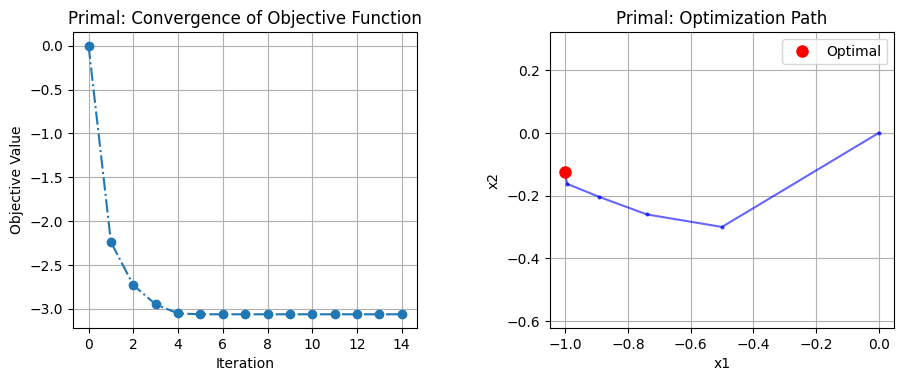

In [20]:

# Solve primal problem
print("\n" + "="*50)
print("PART A: Solving Primal Problem via Gradient Descent")
print("="*50)

x_opt_primal, objectives_primal, x_history = gradient_descent_primal(learning_rate=0.1, max_iter=2000)

print(f"Optimal solution (primal): x* = {x_opt_primal}")
print(f"Optimal objective value, f(x*) = {objective(x_opt_primal):.6f}")
print(f"Constraint satisfaction: (Ax* - b) = {A @ x_opt_primal - b}")

# Plot convergence for primal
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(objectives_primal,'-.o')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Primal: Convergence of Objective Function')
plt.grid(True)

# Plot optimization path
plt.subplot(1, 3, 2)
x_hist = np.array(x_history)
plt.plot(x_hist[:, 0], x_hist[:, 1], 'bo-', markersize=2, alpha=0.6)
plt.plot(x_opt_primal[0], x_opt_primal[1], 'ro', markersize=8, label='Optimal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Primal: Optimization Path')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout(pad=5.0)

<hr/>

## (3) - Ans.(c)

#### <b>NOTE :</b> The handwritten derivation in part-3.(b) can be found after the bottom end of the Python NoteBook.

In [21]:
rows,cols = A.shape

# Part c: Solve dual problem using Gradient Ascent with Projection
def dual_objective(λ):
    term = c + A.T @ λ
    return -0.5 * (term @ (Q_inv @ term)) - λ.T@b

def dual_gradient(λ):

    term = c + A.T @ λ
    return -A @ (Q_inv @ term) - b

def project_dual(λ):
    # Project λ onto non-negative orthant
    return np.maximum(λ, 0)

def gradient_ascent_dual(learning_rate=0.1, max_iter=1000, tol=1e-8):
    """Solve dual QP using projected gradient ascent"""
    # Initialize
    λ = np.zeros(rows) # np.array([0.0]*rows)
    objectives = []
    λ_history = [λ.copy()]
    
    for i in range(max_iter):
        # Compute objective
        obj = dual_objective(λ)
        objectives.append(obj)
        
        # Compute gradient (negative for ascent)
        grad = dual_gradient(λ)
        
        # Gradient ascent step
        λ_new = λ + learning_rate * (grad)
        
        # Project onto feasible set (λ ≥ 0)
        λ_new = project_dual(λ_new)
        
        # Check convergence
        if np.linalg.norm(λ_new - λ) < tol:
            break
            
        λ = λ_new
        λ_history.append(λ.copy())
    
    return λ, objectives, λ_history
    

In [22]:
# ===================== PART C: Solve Dual Problem =====================
print("\n" + "="*50)
print("PART C: Solving Dual Problem via Gradient Descent")
print("="*50)

λ_opt_dual_dual, objectives_dual, λ_history = gradient_ascent_dual(learning_rate=0.1, max_iter=2000)

print(f"Optimal dual variables: λ* = {λ_opt_dual_dual}")
print(f"Optimal dual objective value, D(λ*) = {dual_objective(λ_opt_dual_dual):.6f}")

# Recover primal solution from dual
x_from_dual = -Q_inv @ (c + A.T @ λ_opt_dual_dual)
print(f"Recovered primal from dual: x* = {x_from_dual}")
print(f"Recovered primal objective: {objective(x_from_dual):.6f}")



PART C: Solving Dual Problem via Gradient Descent
Optimal dual variables: λ* = [0.   0.75 0.   0.  ]
Optimal dual objective value, D(λ*) = -3.062500
Recovered primal from dual: x* = [-1.    -0.125]
Recovered primal objective: -3.062500


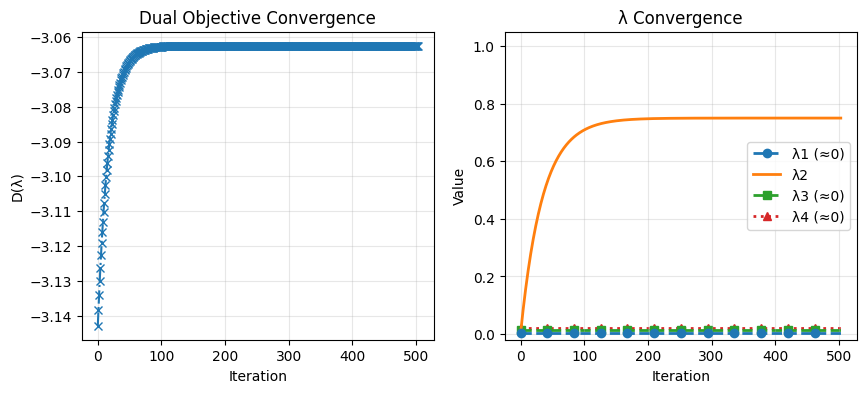

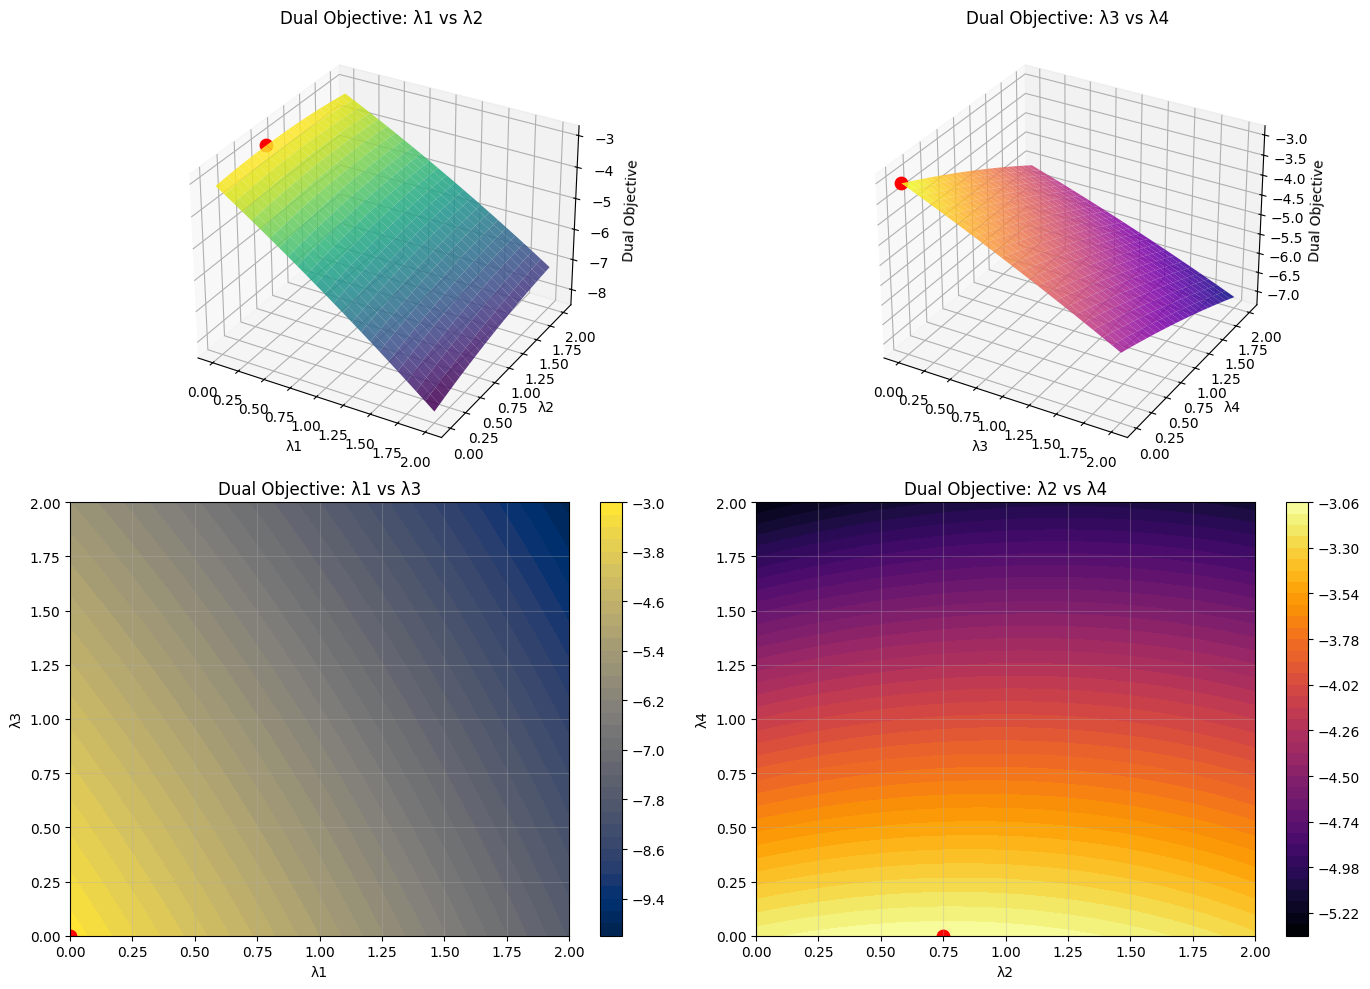

In [23]:
# === 6-plot layout (2 rows x 3 columns, equal space) ===
fig, axes = plt.subplots(1, 2, figsize=(10,4))
ax = axes.ravel()   # flatten for easy indexing

# 1. Dual objective convergence
ax[0].plot(objectives_dual, '-.x')
ax[0].set_title("Dual Objective Convergence")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("D(λ)")
ax[0].grid(True, alpha=0.3)

# 2. Convergence of λ values (4 lines)
vals = np.array(λ_history)
colors = ['tab:blue','tab:orange','tab:green','tab:red']
styles = ['--','-','--',':']
markers = ['o',None,'s','^']

tol = 1e-10
ymax = max(vals.max(), 1.0)
eps_base = 0.005 * ymax        # small cosmetic offset

for i in range(4):
    y_ = vals[:, i].copy()
    if np.all(np.abs(y_) < tol):           # if basically zero
        y_ = y_ + (i+1) * eps_base          # tiny offset to separate lines
        lbl = f'λ{i+1} (≈0)'
    else:
        lbl = f'λ{i+1}'
    ax[1].plot(y_, label=lbl, linewidth=2, color=colors[i], linestyle=styles[i], marker=markers[i], markevery=len(y_)//12, zorder=3-i)

ax[1].set_title("λ Convergence")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Value")
ax[1].set_ylim(-0.02*ymax, 1.05*ymax)     # leave room below 0 for offsets
ax[1].legend()
ax[1].grid(True, alpha=0.3)


# 4 comparisons: (λi, λj, kind, cmap, subplot_index)
pairs = [
    (0, 1, "surface", "viridis", 1),  # λ1 vs λ2 (3D surface)
    (2, 3, "surface", "plasma",  2),  # λ3 vs λ4 (3D surface)
    (0, 2, "contour", "cividis", 3),  # λ1 vs λ3 (contour)
    (1, 3, "contour", "inferno",  4),  # λ2 vs λ4 (contour)
]

fig = plt.figure(figsize=(14, 10))  # 2 rows x 2 cols
for (i, j, kind, cmap, k) in pairs:
    # Axes with/without 3D projection
    ax = fig.add_subplot(2, 2, k, projection='3d' if kind == "surface" else None)

    # Mesh (bounds from λ* for each coordinate)
    n = 25 if kind == "surface" else 31
    L1 = np.linspace(0, max(2.0, 1.5 * float(λ_opt_dual_dual[i])), n)
    L2 = np.linspace(0, max(2.0, 1.5 * float(λ_opt_dual_dual[j])), n)
    X_, Y_ = np.meshgrid(L1, L2)

    # Evaluate dual on the grid (others held at λ*)
    Z_ = np.zeros_like(X_, dtype=float)
    for rs in range(X_.shape[0]):
        for cs in range(X_.shape[1]):
            lam = λ_opt_dual_dual.copy()
            lam[i], lam[j] = X_[rs, cs], Y_[rs, cs]
            Z_[rs, cs] = dual_objective(lam)

    # Draw
    if kind == "surface":
        ax.plot_surface(X_, Y_, Z_, cmap=cmap, alpha=0.85, linewidth=0, antialiased=True)
        ax.scatter(λ_opt_dual_dual[i], λ_opt_dual_dual[j], dual_objective(λ_opt_dual_dual), s=80, c='r')
        ax.set_zlabel('Dual Objective')
    else:
        cs = ax.contourf(X_, Y_, Z_, levels=40, cmap=cmap)
        fig.colorbar(cs, ax=ax)
        ax.scatter(λ_opt_dual_dual[i], λ_opt_dual_dual[j], s=80, c='r')

    ax.set_xlabel(f'λ{i+1}')
    ax.set_ylabel(f'λ{j+1}')
    ax.set_title(f'Dual Objective: λ{i+1} vs λ{j+1}')
    ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()


In [24]:

# Verify strong duality
primal_opt = objective(x_opt_primal)
dual_opt = dual_objective(λ_opt_dual_dual)

print("\n" + "="*50)
print("STRONG DUALITY VERIFICATION")
print("="*50)
print(f"Primal optimal value: {primal_opt:.8f}")
print(f"Dual optimal value: {dual_opt:.8f}")
print(f"Duality gap: {primal_opt - dual_opt:.2e}")

if abs(primal_opt - dual_opt) < 1e-6:
    print("The values are equal - Strong duality holds!")
else:
    print(" Duality gap exists - Weakly dual")

# Additional analysis
print("\n" + "="*50)
print("ADDITIONAL ANALYSIS")
print("="*50)
print("Active constraints analysis:")
constraint_violation = A @ x_opt_primal - b
for i in range(len(b)):
    status = "ACTIVE" if abs(constraint_violation[i]) < 1e-6 else "INACTIVE"
    print(f"Constraint {i+1}: {A[i]}·x ≤ {b[i]} | Violation: {constraint_violation[i]:.2e} | {status}")

print(f"\nCorresponding dual variables: {λ_opt_dual_dual}")
print("Note: Non-zero dual variables indicate active constraints")


STRONG DUALITY VERIFICATION
Primal optimal value: -3.06250000
Dual optimal value: -3.06250000
Duality gap: 1.82e-14
The values are equal - Strong duality holds!

ADDITIONAL ANALYSIS
Active constraints analysis:
Constraint 1: [1 0]·x ≤ 1 | Violation: -2.00e+00 | INACTIVE
Constraint 2: [-1  0]·x ≤ 1 | Violation: 0.00e+00 | ACTIVE
Constraint 3: [0 1]·x ≤ 1 | Violation: -1.13e+00 | INACTIVE
Constraint 4: [ 0 -1]·x ≤ 1 | Violation: -8.75e-01 | INACTIVE

Corresponding dual variables: [0.   0.75 0.   0.  ]
Note: Non-zero dual variables indicate active constraints


#### For round-off errors, controlling the tolerance value and setting it to 8 decimals (i.e 10<sup>-8</sup>) is an effective method. Hence we filter the absolute values less than the defined tolerance, and set them to zero explicitly. Hence, we ensure equality for floating point or double/decimal type values, in case such values are less than the defined tolerance, in computer systems, and in general for programming language models.

## In conclusion, we see <b><i>"Strong Duality"</i></b> as both Dual and Primal Values result in the same value (-3.0625), Hence, ([Primal_Value] == [Dual_Value])

<hr/>

## (3) - Ans.(b)

Handwritten Derivation for Quadratic Programming Dual, which was used above for calculations.